In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def forward(obs, transition_probability, emission_probability, start_probability):
    T = len(obs)
    N = transition_probability.shape[0]
    alpha = np.zeros((T, N))
    alpha[0] = emission_probability[:, obs[0]] * start_probability
    for i in range(1, T):
        alpha[i] = emission_probability[:, obs[i]] * np.inner(alpha[i - 1], transition_probability)
    return alpha


In [6]:
data_file = "../../data/sp500w.csv"
df = pd.read_csv(data_file)
print('Number of rows:',len(df))
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

Number of rows: 509


,Close
0,0.037213
1,0.020674
2,-0.028198
3,-0.045812
4,-0.006639


In [12]:
df= df[df["Close"] > -0.2]

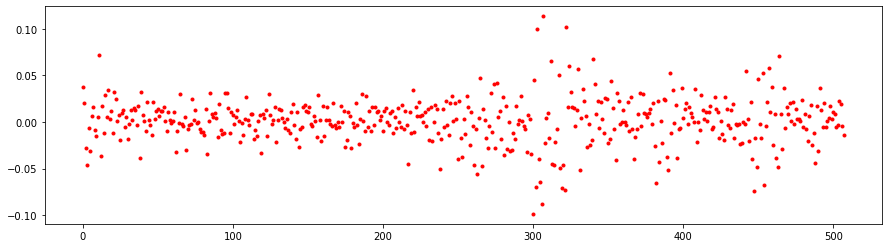

In [13]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(np.arange(len(df)), df["Close"], ".", color="red", label="SP500");

In [14]:
data = np.array(df["Close"])

In [15]:
data.shape

(508,)

In [79]:
gamma = np.array([[1,2,3], [3,2,1], [1,2,3]])
X = np.array([3,2,2])

In [83]:
gamma

array([[1, 2, 3],
       [3, 2, 1],
       [1, 2, 3]])

In [80]:
gamma/X

array([[0.33333333, 1.        , 1.5       ],
       [1.        , 1.        , 0.5       ],
       [0.33333333, 1.        , 1.5       ]])

In [81]:
X.reshape(1,-1).T

array([[3],
       [2],
       [2]])

In [82]:
gamma/X.reshape(1,-1).T

array([[0.33333333, 0.66666667, 1.        ],
       [1.5       , 1.        , 0.5       ],
       [0.5       , 1.        , 1.5       ]])

In [61]:
Y

array([3, 4, 6])

In [62]:
Y/np.sum(gamma[0,:], axis=0)

array([0.5       , 0.66666667, 1.        ])

In [63]:
np.sum(gamma[0,:], axis=0)

6

In [65]:
Z = np.outer(X,X)

In [66]:
Z

array([[9, 6, 6],
       [6, 4, 4],
       [6, 4, 4]])

In [67]:
Z = gamma[0,:] * Z

In [68]:
Z

array([[ 9, 12, 18],
       [ 6,  8, 12],
       [ 6,  8, 12]])

In [69]:
Z/np.sum(gamma[0,:], axis=0)

array([[1.5       , 2.        , 3.        ],
       [1.        , 1.33333333, 2.        ],
       [1.        , 1.33333333, 2.        ]])

In [70]:
G0 = [0.34756709, 0.34797289, 0.34917218, 0.34960446, 0.34864312, 0.34923771, 0.34832689, 0.34809296, 0.34868415, 0.34884051]

In [71]:
np.sum(G0)

3.48614196

In [101]:
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])

In [102]:
a

array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])

In [104]:
ind = a.argsort()[-3:][::-1]

In [105]:
ind

array([5, 0, 8])

In [106]:
a[ind]

array([9, 9, 6])